In [17]:
import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("✅ GPU available:", tf.config.list_physical_devices('GPU'))


✅ TensorFlow version: 2.19.0
✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Loading the Dataset from Kaggle**

# **Deleted the loading part for security reasons, as I used the Kaggle API.**

In [34]:
import os
data_dir = "/content/data/chest_xray/chest_xray"
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "val")
test_dir  = os.path.join(data_dir, "test")

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras import layers

In [35]:
train_ds=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)
val_ds=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)
test_ds=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [36]:
class_name=train_ds.class_names

In [44]:
class_name

['NORMAL', 'PNEUMONIA']

In [22]:
from tensorflow.data import AUTOTUNE
train_ds=train_ds.cache().shuffle(2500).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
data_aug=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

In [24]:
model=Sequential()
model.add(layers.Input(shape=(128,128,1)))
model.add(Rescaling(1./255))
model.add(data_aug)
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu",kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu",kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,220,353 (19.91 MB)

 Trainable params: 5,220,353 (19.91 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,verbose=1,restore_best_weights=True)

In [27]:
history=model.fit(train_ds,epochs=80,validation_data=test_ds,callbacks=[early_stop])

Epoch 1/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.7115 - loss: 1.0284 - val_accuracy: 0.6282 - val_loss: 0.6027
Epoch 2/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7965 - loss: 0.4408 - val_accuracy: 0.7965 - val_loss: 0.4697
Epoch 3/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8797 - loss: 0.3020 - val_accuracy: 0.7356 - val_loss: 0.5115
Epoch 4/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8782 - loss: 0.3141 - val_accuracy: 0.8766 - val_loss: 0.3108
Epoch 5/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9003 - loss: 0.2522 - val_accuracy: 0.8702 - val_loss: 0.3254
Epoch 6/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9003 - loss: 0.2508 - val_accuracy: 0.8846 - val_loss: 0.2674
Epoch 7/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8992 - loss: 0.2349 - val_accuracy: 0.8205 - val_loss: 0.5994
Epoch 8/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9182 - loss: 0.2034 - val_acc

In [28]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8973 - loss: 0.3011


[0.2666267156600952, 0.8974359035491943]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = (model.predict(test_ds) > 0.5).astype(int)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['Normal','Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[203  31]
 [ 33 357]]
              precision    recall  f1-score   support

      Normal       0.86      0.87      0.86       234
   Pneumonia       0.92      0.92      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



In [31]:
model.save("chest_xray_model.keras")
from google.colab import files
files.download("chest_xray_model.keras")
print("Successful")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successful


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted: NORMAL (Confidence: 0.06)


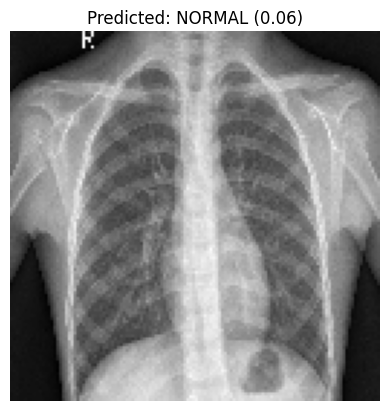

In [58]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Confirmed class names
class_name = ['NORMAL', 'PNEUMONIA']

# Load and preprocess the image
img_path = "/content/data/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# Predict
prediction = model.predict(img_array)
pred_index = int(prediction[0][0] > 0.5)  # threshold at 0.5
pred_class = class_name[pred_index]

print(f"Predicted: {pred_class} (Confidence: {prediction[0][0]:.2f})")

# Visualize
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {pred_class} ({prediction[0][0]:.2f})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: PNEUMONIA (Confidence: 0.95)


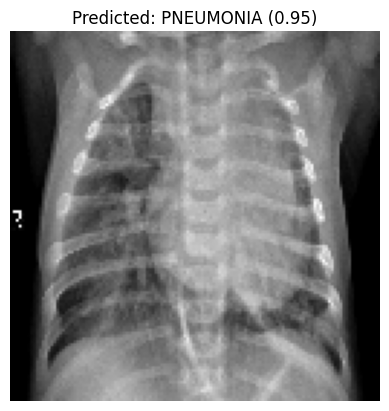

In [59]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Confirmed class names
class_name = ['NORMAL', 'PNEUMONIA']

# Load and preprocess the image
img_path = "/content/data/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# Predict
prediction = model.predict(img_array)
pred_index = int(prediction[0][0] > 0.5)  # threshold at 0.5
pred_class = class_name[pred_index]

print(f"Predicted: {pred_class} (Confidence: {prediction[0][0]:.2f})")

# Visualize
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {pred_class} ({prediction[0][0]:.2f})")
plt.axis("off")
plt.show()
